In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
%matplotlib inline

## Describe DataSet
I am interested inthis data set because of the nature of the data, World Suicide Statistics, and because it is provided by the World Health Organization, WHO.  Unfortunately, the data seems to be just a subset of a bigger data set and focuses only on countries, population, and number of suicides.  It would have been interesting if the data set would contain more detail information.  However, for the purpose of the report, it provides sufficient information to analyze and get feed back.

The data set contains basic information on the number of suices from 1980 - 2016 by country, year, and demographic group.

In [9]:
suicide_data = pd.read_csv('C:\\MyData\\DataSet\\who-suicide-statistics\\who_suicide_statistics.csv')

In [10]:
np.random.seed(53)
obs, feat = suicide_data.shape
suicide_data.sample(5)

,country,year,sex,age,suicides_no,population
36847,Spain,1999,male,25-34 years,368.0,3349113.0
27489,New Zealand,2012,male,5-14 years,7.0,297240.0
41545,United Kingdom,1986,female,25-34 years,161.0,3980652.0
18746,Iceland,1987,female,35-54 years,2.0,26200.0
38569,Syrian Arab Republic,1985,female,25-34 years,0.0,NaN


In [29]:
print(str("Dataset consist of " + str(obs) + " observations and " + str(feat) + " features. Features are following:"))

Dataset consist of 43776 observations and 6 features. Features are following:


In [12]:
suicide_data.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

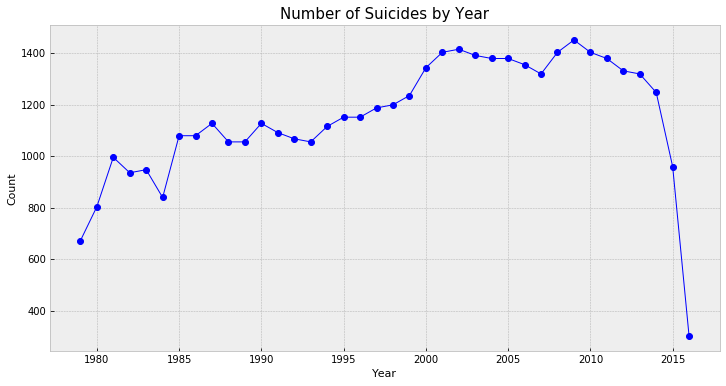

In [15]:
temp1 = suicide_data.groupby(suicide_data.year)[['year']].count()
temp1 = temp1.rename(columns={"year": "Count"})

plt.figure(figsize=(12, 6))
plt.style.use('bmh')
plt.plot(temp1.index, 'Count', data=temp1, color='blue', marker='o', linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Number of Suicides by Year', loc='center', fontsize=15)
plt.show()

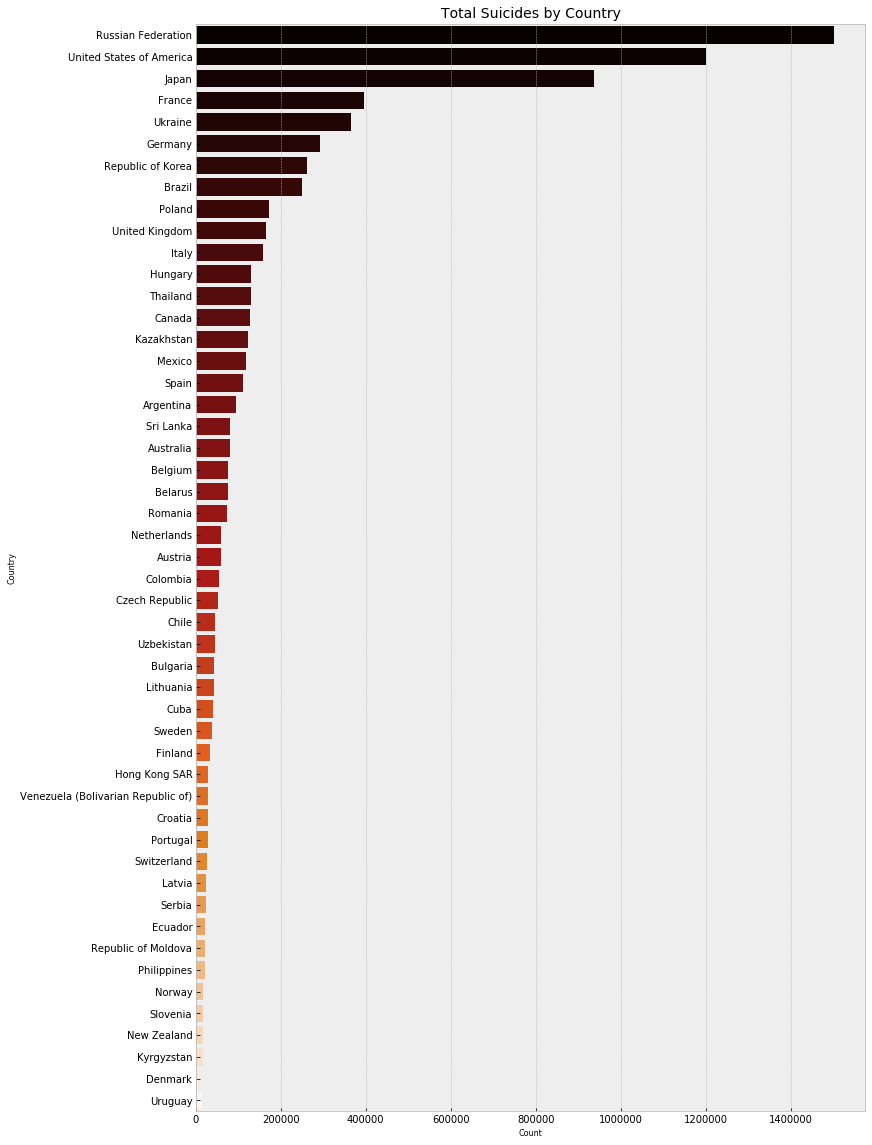

In [28]:
temp2 = suicide_data.groupby(suicide_data.country)[['suicides_no']].sum()
temp2 = temp2.rename(columns={"suicides_no": "Count"})
temp2 = temp2.sort_values(by='Count', ascending=False)
temp2_top = temp2.head(50)

plt.figure(figsize=(12, 20))
sns.barplot(y=temp2_top.index, x='Count', data=temp2_top, palette='gist_heat', orient='h')
plt.xlabel('Count', fontsize=8)
plt.ylabel('Country', fontsize=8)
plt.title('Total Suicides by Country', loc='center', fontsize=14)
plt.show()

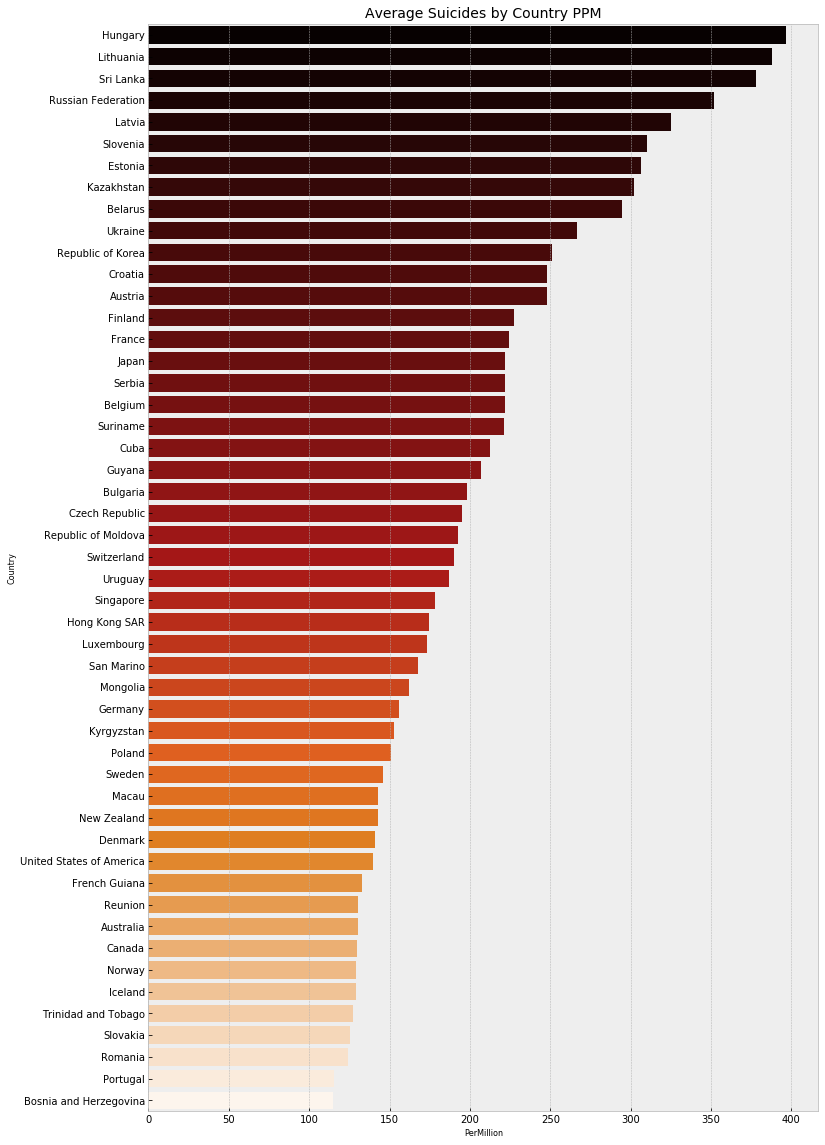

In [36]:
temp3 = suicide_data.copy()
temp3['ppm'] = suicide_data.suicides_no / suicide_data.population * 1000000
temp4 = temp3.groupby(suicide_data.country)[['ppm']].mean()

temp4 = temp4.sort_values(by='ppm', ascending=False)
temp4_top = temp4.head(50)

plt.figure(figsize=(12, 20))
sns.barplot(y=temp4_top.index, x='ppm', data=temp4_top, palette='gist_heat', orient='h')
plt.xlabel('PerMillion', fontsize=8)
plt.ylabel('Country', fontsize=8)
plt.title('Average Suicides by Country PPM', loc='center', fontsize=14)
plt.show()

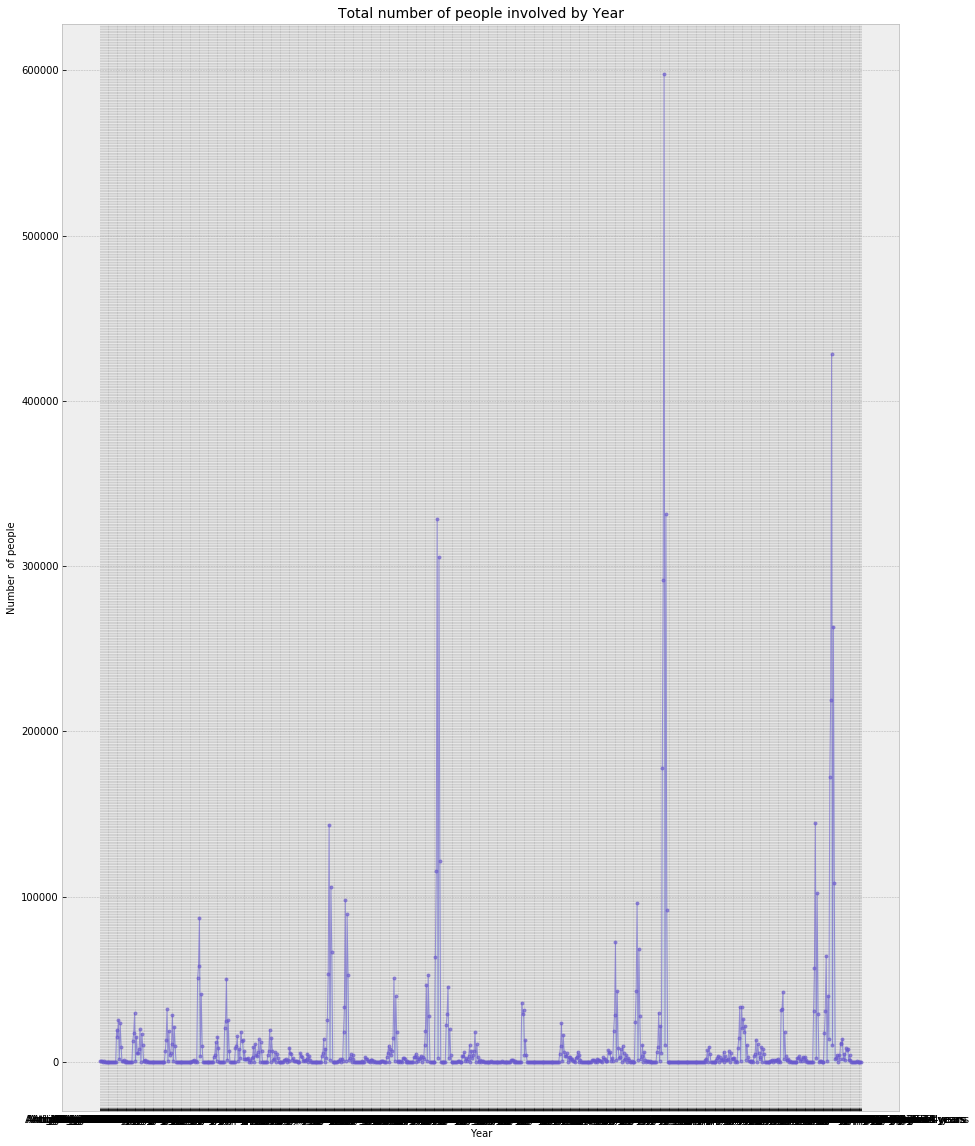

In [48]:
# Suicides by Country and Age Group
country_age_data = suicide_data.copy()
country_age_data['CountryAge'] = country_age_data['country'] + ': ' + country_age_data['age']
prop_by_age = country_age_data.groupby(country_age_data.CountryAge)[['suicides_no']].sum()
prop_by_age = prop_by_age.rename(columns={"suicides_no": "Suicides"})
#print(prop_by_age)

plt.figure(figsize=(15,20))
plt.fill_between(prop_by_age.index, 'Suicides', data=prop_by_age, color="skyblue", alpha=0.2)
plt.plot(prop_by_age.index, 'Suicides', data=prop_by_age, marker = ".", color="Slateblue", alpha=0.6, linewidth=1)

#plt.fill_between(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", alpha=0.2)
#plt.plot(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", marker = ".", alpha=0.6, linewidth=1)
#plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number  of people', fontsize=10)
plt.title('Total number of people involved by Year', loc='Center', fontsize=14)
plt.show()